In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import statistics
import matplotlib.pyplot as plt

### SQL Database

In [2]:
import sqlite3 # library for working with sqlite database
conn = sqlite3.connect("/Volumes/Abbi/MIMIC.db") # Create a connection to the on-disk database

In [3]:
pd.read_sql("SELECT * FROM sqlite_master where type='table'", conn)

,type,name,tbl_name,rootpage,sql
0,table,CHARTEVENTS,CHARTEVENTS,2,"CREATE TABLE CHARTEVENTS(\n ""ROW_ID"" TEXT,\n ..."
1,table,PROCEDUREEVENTS_MV,PROCEDUREEVENTS_MV,9120960,"CREATE TABLE ""PROCEDUREEVENTS_MV"" (\n""index"" I..."
2,table,CALLOUT,CALLOUT,9132354,"CREATE TABLE ""CALLOUT"" (\n""index"" INTEGER,\n ..."
3,table,D_CPT,D_CPT,9133903,"CREATE TABLE ""D_CPT"" (\n""index"" INTEGER,\n ""R..."
4,table,D_ITEMS,D_ITEMS,9133909,"CREATE TABLE ""D_ITEMS"" (\n""index"" INTEGER,\n ..."
5,table,CAREGIVERS,CAREGIVERS,9134171,"CREATE TABLE ""CAREGIVERS"" (\n""index"" INTEGER,\..."
6,table,MICROBIOLOGYEVENTS,MICROBIOLOGYEVENTS,9134246,"CREATE TABLE ""MICROBIOLOGYEVENTS"" (\n""index"" I..."
7,table,LABEVENTS,LABEVENTS,9153054,"CREATE TABLE ""LABEVENTS"" (\n""index"" INTEGER,\n..."
8,table,INPUTEVENTS_CV,INPUTEVENTS_CV,9708019,"CREATE TABLE ""INPUTEVENTS_CV"" (\n""index"" INTEG..."
9,table,ADMISSIONS,ADMISSIONS,10291267,"CREATE TABLE ""ADMISSIONS"" (\n""index"" INTEGER,\..."


In [4]:
admissions_df = pd.read_sql("""SELECT *
                            FROM admissions
                            """, conn)

In [5]:
patients_df = pd.read_sql("""SELECT *
                            FROM patients
                            """, conn)

In [6]:
# Join admissions and patient
patient_admissions_df = pd.read_sql("""SELECT *
            FROM admissions 
            LEFT JOIN patients ON admissions.SUBJECT_ID = patients.SUBJECT_ID""", conn)

In [7]:
patient_admissions_df

,index,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,...,HAS_CHARTEVENTS_DATA,index,ROW_ID,SUBJECT_ID,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG
0,0,21,22,165315,2196-04-09 12:26:00,2196-04-10 15:54:00,None,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,...,1,240,19,22,F,2131-05-07 00:00:00,None,None,None,0
1,1,22,23,152223,2153-09-03 07:15:00,2153-09-08 19:10:00,None,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,...,1,241,20,23,M,2082-07-17 00:00:00,None,None,None,0
2,2,23,23,124321,2157-10-18 19:34:00,2157-10-25 14:00:00,None,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,...,1,241,20,23,M,2082-07-17 00:00:00,None,None,None,0
3,3,24,24,161859,2139-06-06 16:14:00,2139-06-09 12:48:00,None,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,...,1,242,21,24,M,2100-05-31 00:00:00,None,None,None,0
4,4,25,25,129635,2160-11-02 02:06:00,2160-11-05 14:55:00,None,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,...,1,243,22,25,M,2101-11-21 00:00:00,None,None,None,0
5,5,26,26,197661,2126-05-06 15:16:00,2126-05-13 15:00:00,None,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,...,1,244,23,26,M,2054-05-04 00:00:00,2128-02-25 00:00:00,None,2128-02-25 00:00:00,1
6,6,27,27,134931,2191-11-30 22:16:00,2191-12-03 14:45:00,None,NEWBORN,PHYS REFERRAL/NORMAL DELI,HOME,...,1,245,24,27,F,2191-11-30 00:00:00,None,None,None,0
7,7,28,28,162569,2177-09-01 07:15:00,2177-09-06 16:00:00,None,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,...,1,246,25,28,M,2103-04-15 00:00:00,None,None,None,0
8,8,29,30,104557,2172-10-14 14:17:00,2172-10-19 14:37:00,None,URGENT,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,...,1,247,26,30,M,1872-10-14 00:00:00,None,None,None,0
9,9,30,31,128652,2108-08-22 23:27:00,2108-08-30 15:00:00,2108-08-30 15:00:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,...,1,248,27,31,M,2036-05-17 00:00:00,2108-08-30 00:00:00,2108-08-30 00:00:00,2108-08-30 00:00:00,1


In [8]:
final_table = pd.read_csv('/Users/shanduzamm/Abbi Data Sci 590/Final Project/data/admissions_final_cohort.csv')


In [9]:
final_HADM_ID = final_table['HADM_ID'].values

In [10]:
final_patients_admissions = pd.DataFrame(patient_admissions_df.loc[patient_admissions_df['HADM_ID'].isin(final_HADM_ID)])

In [11]:
num_patients = final_patients_admissions['SUBJECT_ID'].iloc[:,1].value_counts().shape[0]

In [12]:
num_admissions = final_patients_admissions['HADM_ID'].value_counts().shape[0]

In [13]:
patient_ids = final_patients_admissions['SUBJECT_ID'].iloc[:,1].values

In [14]:
final_patients = patients_df.loc[patients_df['SUBJECT_ID'].isin(patient_ids)]

In [34]:
final_patients_admissions

,index,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,...,index,ROW_ID,SUBJECT_ID,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG,AGE
0,0,21,22,165315,2196-04-09 12:26:00,2196-04-10 15:54:00,None,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,...,240,19,22,F,2131-05-07,None,None,None,0,64.969863
1,1,22,23,152223,2153-09-03 07:15:00,2153-09-08 19:10:00,None,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,...,241,20,23,M,2082-07-17,None,None,None,0,71.178082
2,2,23,23,124321,2157-10-18 19:34:00,2157-10-25 14:00:00,None,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,...,241,20,23,M,2082-07-17,None,None,None,0,75.304110
3,3,24,24,161859,2139-06-06 16:14:00,2139-06-09 12:48:00,None,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,...,242,21,24,M,2100-05-31,None,None,None,0,39.041096
4,4,25,25,129635,2160-11-02 02:06:00,2160-11-05 14:55:00,None,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,...,243,22,25,M,2101-11-21,None,None,None,0,58.989041
5,5,26,26,197661,2126-05-06 15:16:00,2126-05-13 15:00:00,None,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME,...,244,23,26,M,2054-05-04,2128-02-25 00:00:00,None,2128-02-25 00:00:00,1,72.052055
7,7,28,28,162569,2177-09-01 07:15:00,2177-09-06 16:00:00,None,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,...,246,25,28,M,2103-04-15,None,None,None,0,74.432877
9,9,30,31,128652,2108-08-22 23:27:00,2108-08-30 15:00:00,2108-08-30 15:00:00,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,DEAD/EXPIRED,...,248,27,31,M,2036-05-17,2108-08-30 00:00:00,2108-08-30 00:00:00,2108-08-30 00:00:00,1,72.312329
10,10,31,32,175413,2170-04-04 08:00:00,2170-04-23 12:45:00,None,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME,...,249,28,32,M,2124-09-29,None,None,None,0,45.542466
11,11,32,33,176176,2116-12-23 22:30:00,2116-12-27 12:05:00,None,EMERGENCY,EMERGENCY ROOM ADMIT,HOME,...,250,29,33,M,2034-08-02,None,None,None,0,82.446575


In [16]:
# Make an age column (age at admit)
final_patients_admissions['DOB'] = pd.to_datetime(final_patients_admissions['DOB'])
final_patients_admissions['ADMITTIME'] = pd.to_datetime(final_patients_admissions['ADMITTIME'])
final_patients_admissions['AGE'] = ((final_patients_admissions['ADMITTIME'] - final_patients_admissions['DOB']).dt.days / 365)

In [17]:
final_patients_admissions['AGE'].describe()

count    41631.000000
mean        62.924717
std         16.443650
min         16.032877
25%         52.457534
50%         64.802740
75%         76.319178
max         89.060274
Name: AGE, dtype: float64

In [18]:
final_patients_admissions['GENDER'].describe()

count     41631
unique        2
top           M
freq      23772
Name: GENDER, dtype: object

In [19]:
final_patients_admissions.columns

Index(['index', 'ROW_ID', 'SUBJECT_ID', 'HADM_ID', 'ADMITTIME', 'DISCHTIME',
       'DEATHTIME', 'ADMISSION_TYPE', 'ADMISSION_LOCATION',
       'DISCHARGE_LOCATION', 'INSURANCE', 'LANGUAGE', 'RELIGION',
       'MARITAL_STATUS', 'ETHNICITY', 'EDREGTIME', 'EDOUTTIME', 'DIAGNOSIS',
       'HOSPITAL_EXPIRE_FLAG', 'HAS_CHARTEVENTS_DATA', 'index', 'ROW_ID',
       'SUBJECT_ID', 'GENDER', 'DOB', 'DOD', 'DOD_HOSP', 'DOD_SSN',
       'EXPIRE_FLAG', 'AGE'],
      dtype='object')

In [21]:
final_patients_admissions['ETHNICITY'].value_counts()

WHITE                                                       29299
BLACK/AFRICAN AMERICAN                                       3842
UNKNOWN/NOT SPECIFIED                                        3303
HISPANIC OR LATINO                                           1117
OTHER                                                         945
UNABLE TO OBTAIN                                              661
ASIAN                                                         625
PATIENT DECLINED TO ANSWER                                    402
HISPANIC/LATINO - PUERTO RICAN                                202
ASIAN - CHINESE                                               192
BLACK/CAPE VERDEAN                                            152
WHITE - RUSSIAN                                               123
BLACK/HAITIAN                                                  78
MULTI RACE ETHNICITY                                           77
WHITE - OTHER EUROPEAN                                         69
ASIAN - AS

In [25]:
final_table['length_of_stay_days'] = final_table['length_of_stay']/24

In [27]:
final_table['length_of_stay_days'].describe()

count    41631.000000
mean         8.107847
std          6.636930
min          0.188889
25%          4.090972
50%          6.648611
75%         10.489931
max        206.425694
Name: length_of_stay_days, dtype: float64

In [43]:
# How many admits resulted in death?
final_table['DEATHTIME'].value_counts().sum()

4502

In [44]:
final_table['ADMISSION_TYPE'].value_counts()

EMERGENCY    33927
ELECTIVE      6701
URGENT        1003
Name: ADMISSION_TYPE, dtype: int64

In [48]:
final_table['DIAGNOSIS'].value_counts()


PNEUMONIA                                                                                                1224
SEPSIS                                                                                                    936
CORONARY ARTERY DISEASE                                                                                   782
CONGESTIVE HEART FAILURE                                                                                  718
CHEST PAIN                                                                                                676
GASTROINTESTINAL BLEED                                                                                    587
CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS GRAFT /SDA                                                 578
ALTERED MENTAL STATUS                                                                                     561
INTRACRANIAL HEMORRHAGE                                                                                   520
UPPER GI B

[Text(0, 0.5, 'Percent'), Text(0.5, 0, 'Age (years)')]

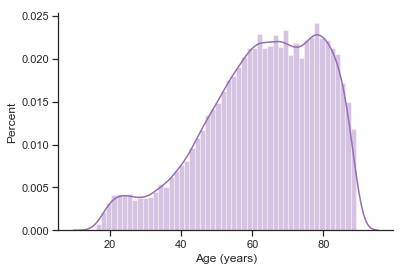

In [65]:
sns.set(style="white", palette="muted", color_codes=True)
sns.set_style("ticks")
ax = sns.distplot(final_patients_admissions['AGE'], color='m')
sns.despine()
ax.set(xlabel='Age (years)', ylabel='Percent')

[Text(0, 0.5, 'Percent'), Text(0.5, 0, 'Length of Stay (days)')]

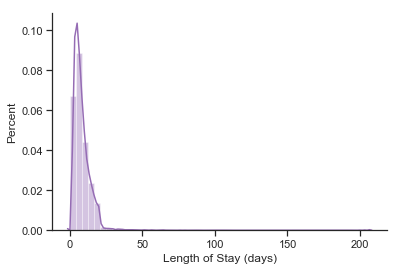

In [64]:
sns.set(style="white", palette="muted", color_codes=True)
sns.set_style("ticks")
ax = sns.distplot(final_table['length_of_stay_days'], color='m')
sns.despine()
ax.set(xlabel='Length of Stay (days)', ylabel='Percent')